In [1]:
## This is Rodrigo Gutierrez's midterm notebook. Our group is researching park equity in the 2nd and 5th Supervisorial Districts
## in Los Angeles, CA. The members of my group are Annie Chan, Miles Parr Kim, Aydin Pasebani, and Max Garcia.

In [2]:
## I am focusing my code on the number of unhoused individuals in LA County comparing that to the average rent, and whether
## parks are more prevalent in census tracts with higher rent costs.

In [3]:
## Here I am importing all my libraries that I will potentially use. I may not use them all, but I like to import them just in
## case.

In [4]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix as distance_matrix
from shapely.geometry import Point

In [5]:
## Here I am reading in my GEOJSON file of the 2020 Census tracts.

In [6]:
tracts = gpd.read_file('data/2020_Census_Tracts.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [7]:
## Here I am creating a 'FIPS' column because I will use this later on to merge datasets. I used the .head() function to preview
## the data.

In [8]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts.head(3)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220


In [9]:
## Here I am reading in the file containing all the information of the 2nd Supervisioral District.
## I am reading in the column 'CT20' as a string in order to create the 'FIPS' column.

In [10]:
District2 = pd.read_csv('data/District2 (1).csv',
    dtype =
    {
        'CT20':str,
    }
)

In [11]:
District2['FIPS'] = '06' + '037' + District2['CT20']

In [12]:
## Here I am performing my first merge with the tracts and District 2, on the column 'FIPS'. I then use .head() to visualize.

In [13]:
Dis2tracts = tracts.merge(District2, on = 'FIPS')
Dis2tracts.head()

,OBJECTID,CT20_x,LABEL_x,ShapeSTArea,ShapeSTLength,geometry,FIPS,OBJECTID_12,Join_Count,TARGET_FID,...,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length
0,5631,211000,2110.00,2.859668e+07,25170.331758,"POLYGON ((-118.32268 34.07621, -118.32355 34.0...",06037211000,640,2,640,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,5,Westside Planning Area,3.881413e+06,9270.888577
1,5632,211121,2111.21,2.302636e+06,7588.943500,"POLYGON ((-118.28441 34.07672, -118.28560 34.0...",06037211121,641,2,641,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,3.125745e+05,2799.117227
2,5633,211122,2111.22,3.934734e+06,8274.051868,"POLYGON ((-118.28682 34.07634, -118.28798 34.0...",06037211122,642,3,642,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.341218e+05,3050.487937
3,5634,211123,2111.23,1.851716e+06,6798.256629,"POLYGON ((-118.28231 34.06287, -118.28309 34.0...",06037211123,643,2,643,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,2.513022e+05,2501.035059
4,5635,211124,2111.24,4.252116e+06,8179.690837,"POLYGON ((-118.28681 34.06899, -118.28734 34.0...",06037211124,644,2,644,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.771177e+05,3012.923477


In [14]:
## Reading in District 5 file, doing the same reading in 'CT20' as a string to create 'FIPS' column to merge with tracts data.

In [15]:
District5 = pd.read_csv('data/District5 (1) (1).csv',
    dtype =
    {
        'CT20':str,
    }
 )
District5

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.881001e+06,11695.304277
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147
3,4,1,4,101221,1012.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,5.197057e+05,3378.824327
4,5,1,5,101222,1012.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,4.350619e+05,3685.233312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2468,2,2468,980009,9800.09,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,Metro Planning Area,3.111583e+07,29917.249730
444,2479,1,2479,980020,9800.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.251160e+07,22316.623372
445,2480,2,2480,980021,9800.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.019501e+07,18963.319732
446,2485,1,2485,980026,9800.26,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,1,San Fernando Valley Planning Area,2.040772e+07,37925.072334


In [16]:
District5['FIPS'] = '06' + '037' + District5['CT20']

In [17]:
District5

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,FIPS
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341,06037101110
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.881001e+06,11695.304277,06037101122
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147,06037101220
3,4,1,4,101221,1012.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,5.197057e+05,3378.824327,06037101221
4,5,1,5,101222,1012.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,4.350619e+05,3685.233312,06037101222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2468,2,2468,980009,9800.09,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,Metro Planning Area,3.111583e+07,29917.249730,06037980009
444,2479,1,2479,980020,9800.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.251160e+07,22316.623372,06037980020
445,2480,2,2480,980021,9800.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.019501e+07,18963.319732,06037980021
446,2485,1,2485,980026,9800.26,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,1,San Fernando Valley Planning Area,2.040772e+07,37925.072334,06037980026


In [18]:
## Here I am merging District 5 and the tracts data on the 'FIPS' column.

In [19]:
Dis5tracts = tracts.merge(District5, on = 'FIPS')

In [20]:
## Previewing the data, looks like they merged good.

In [21]:
Dis5tracts.head()

,OBJECTID,CT20_x,LABEL_x,ShapeSTArea,ShapeSTLength,geometry,FIPS,OBJECTID_12,Join_Count,TARGET_FID,...,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,1,1,1,...,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,2,1,2,...,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.881001e+06,11695.304277
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,3,1,3,...,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,4,1,4,...,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,5.197057e+05,3378.824327
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222,5,1,5,...,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,4.350619e+05,3685.233312


In [22]:
## Reading in my data set with the counts of unhoused individuals in LA County. I cleaned this data in Excel before reading in,
## keeping only the columns with the tract number, location, and the counts for unsheltered, sheltered, and total population.

In [23]:
# I read in the column 'Tract Num' as a string in order to create a 'FIPS' number, necessary if I want to merge.

In [24]:
# I used the .head() function after to see how well the data was read, looks pretty good.

In [25]:
unhoused_count = pd.read_csv('data/unhoused.csv',
    dtype =
    {
        'TractNum':str,
    }
)
unhoused_count.head()

,TractNum,Location,Total Unsheltered,Total Sheltered,Total Population
0,101110,Sunland-Tujunga NC,12.614,0,12.614
1,101122,Sunland-Tujunga NC,1.000,0,1.000
2,101210,Sunland-Tujunga NC,14.517,0,14.517
3,101220,Sunland-Tujunga NC,24.058,0,24.058
4,101300,Sunland-Tujunga NC,9.278,0,9.278


In [26]:
## Creating 'FIPS' number for unhoused_count, previewing it to make sure there is a leading zero. Looks good.

In [27]:
unhoused_count['FIPS'] = '06' + '037' + unhoused_count['TractNum']
unhoused_count.head()

,TractNum,Location,Total Unsheltered,Total Sheltered,Total Population,FIPS
0,101110,Sunland-Tujunga NC,12.614,0,12.614,06037101110
1,101122,Sunland-Tujunga NC,1.000,0,1.000,06037101122
2,101210,Sunland-Tujunga NC,14.517,0,14.517,06037101210
3,101220,Sunland-Tujunga NC,24.058,0,24.058,06037101220
4,101300,Sunland-Tujunga NC,9.278,0,9.278,06037101300


In [28]:
## Performing a merge between my merged Dis2tracts and the unhoused_count on 'FIPS'. I used the .head() variable to visualize.

In [29]:
Dis2_tracthome = Dis2tracts.merge(unhoused_count, on ='FIPS')
Dis2_tracthome.head()

,OBJECTID,CT20_x,LABEL_x,ShapeSTArea,ShapeSTLength,geometry,FIPS,OBJECTID_12,Join_Count,TARGET_FID,...,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,TractNum,Location,Total Unsheltered,Total Sheltered,Total Population
0,5631,211000,2110.00,2.859668e+07,25170.331758,"POLYGON ((-118.32268 34.07621, -118.32355 34.0...",06037211000,640,2,640,...,INCORPORATED CITY,5,Westside Planning Area,3.881413e+06,9270.888577,211000,Greater Wilshire NC,9.331,27,36.331
1,5632,211121,2111.21,2.302636e+06,7588.943500,"POLYGON ((-118.28441 34.07672, -118.28560 34.0...",06037211121,641,2,641,...,INCORPORATED CITY,9,Metro Planning Area,3.125745e+05,2799.117227,211121,Rampart Village NC,140.100,0,140.100
2,5633,211122,2111.22,3.934734e+06,8274.051868,"POLYGON ((-118.28682 34.07634, -118.28798 34.0...",06037211122,642,3,642,...,INCORPORATED CITY,9,Metro Planning Area,5.341218e+05,3050.487937,211122,Rampart Village NC,123.470,0,123.470
3,5636,211201,2112.01,1.500116e+06,4915.797811,"POLYGON ((-118.29655 34.07273, -118.29657 34.0...",06037211201,645,2,645,...,INCORPORATED CITY,9,Metro Planning Area,2.036427e+05,1811.419313,211201,Wilshire Center-Koreatown NC,1.427,0,1.427
4,5637,211202,2112.02,1.928501e+06,5559.519694,"POLYGON ((-118.29169 34.07274, -118.29169 34.0...",06037211202,646,3,646,...,INCORPORATED CITY,9,Metro Planning Area,2.617965e+05,2048.091994,211202,Wilshire Center-Koreatown NC,11.762,0,11.762


In [30]:
## Visualizing the data here, showing frequency of unhoused residents. The majority of census tracts, have less than 50.

<Axes: ylabel='Frequency'>

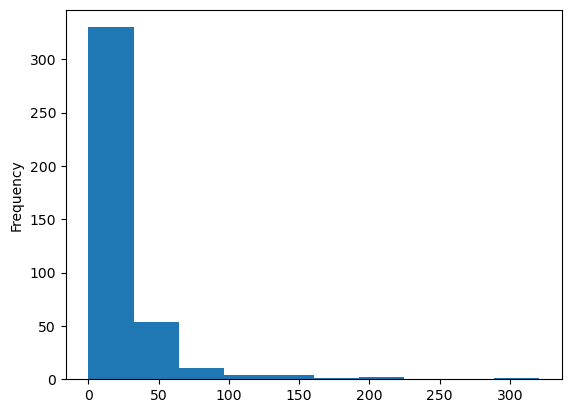

In [31]:
Dis2_tracthome['Total Unsheltered'].plot.hist()

In [32]:
## Here I am doing the same merge as the line above, just doing it with my data from District 5.

In [33]:
Dis5_tracthome = Dis5tracts.merge(unhoused_count, on ='FIPS')
Dis5_tracthome.head()

,OBJECTID,CT20_x,LABEL_x,ShapeSTArea,ShapeSTLength,geometry,FIPS,OBJECTID_12,Join_Count,TARGET_FID,...,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,TractNum,Location,Total Unsheltered,Total Sheltered,Total Population
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,1,1,1,...,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341,101110,Sunland-Tujunga NC,12.614,0,12.614
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,2,1,2,...,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.881001e+06,11695.304277,101122,Sunland-Tujunga NC,1.000,0,1.000
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,3,1,3,...,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147,101220,Sunland-Tujunga NC,24.058,0,24.058
3,4997,101300,1013.00,2.777377e+07,29384.860602,"POLYGON ((-118.26528 34.25238, -118.26539 34.2...",06037101300,6,1,6,...,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.786001e+06,10858.706120,101300,Sunland-Tujunga NC,9.278,0,9.278
4,4998,101400,1014.00,6.791532e+07,42668.928986,"POLYGON ((-118.29946 34.25598, -118.30027 34.2...",06037101400,7,1,7,...,INCORPORATED CITY,3,San Fernando Valley Planning Area,9.256641e+06,15739.594223,101400,Sunland-Tujunga NC,17.615,0,17.615


In [34]:
## Visualizing district 5 data here with census tracts, it has a signficantly different amount of areas, but that might be
## because district 2 has more census tracts given that district 5 is mostly Antelope Valley which is more sparse.

<Axes: ylabel='Frequency'>

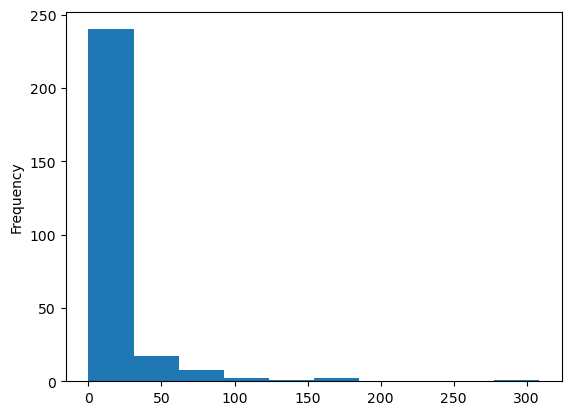

In [35]:
Dis5_tracthome['Total Population'].plot.hist()

In [36]:
## I want to see what are the locations with the highest counts of unhoused individuals. I didn't know what CANNDU was,
## but a quick internet search produced that it stands for 'Community And Neighbors for Ninth District Unity'. This area is in
## South Los Angeles close to the neighborhood of Florence-Graham also nearby.

In [37]:
Dis2_tracthome.sort_values(by='Total Population', ascending = False)[['FIPS', 'Total Population', 'Location']].head(10)

,FIPS,Total Population,Location
170,06037239202,397.98,CANNDU NC
122,06037231100,393.11,South Central NC
247,06037540902,321.08,Willowbrook
241,06037535400,224.23,Florence-Graham
275,06037543305,202.13,Unincorporated Compton
318,06037601401,198.92,Inglewood
134,06037232500,189.22,Empowerment Congress Central NC
96,06037222700,157.26,Empowerment Congress North NC
1,06037211121,140.10,Rampart Village NC
143,06037234902,139.74,Park Mesa Heights Community Council


In [38]:
## Similar to the line above, I see here that unincorporated Antelope Valley and Lancaster show up the most.

In [39]:
Dis5_tracthome.sort_values(by='Total Population', ascending = False)[['FIPS', 'Total Population', 'Location']].head(10)

,FIPS,Total Population,Location
159,06037900102,308.710,Unincorporated Antelope Valley
16,06037121102,164.080,Sun Valley Area NC
189,06037910002,157.520,Unincorporated Antelope Valley
31,06037125200,127.390,Valley Village NC
179,06037901003,96.200,Lancaster
178,06037900806,95.951,Lancaster
173,06037900703,84.454,Lancaster
253,06037920314,82.119,Santa Clarita
177,06037900805,75.068,Lancaster
269,06037980021,73.249,Pacoima NC


In [40]:
## Reading in data about Gross Rent in LA County, reading in GEO_ID as a string to use it to merge. I cleaned the data in Excel.

In [41]:
rent = pd.read_csv('data/rentdata.csv',
dtype=
    {
        'GEO_ID':str,
    }
)
rent

,GEO_ID,NAME,Gross Rent
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1689
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",2529
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1324
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",1484
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",1525
...,...,...,...
2493,06037980038,"Census Tract 9800.38, Los Angeles County, Cali...",-
2494,06037980039,"Census Tract 9800.39, Los Angeles County, Cali...",-
2495,06037990100,"Census Tract 9901, Los Angeles County, California",-
2496,06037990200,"Census Tract 9902, Los Angeles County, California",-


In [42]:
## Here I am renaming the GEO_ID column to 'FIPS' in order to merge with my other data.

In [43]:
rent['FIPS'] = rent['GEO_ID']

In [44]:
## Checking how the data looks making sure there is a leading 0, there is!

In [45]:
rent

,GEO_ID,NAME,Gross Rent,FIPS
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1689,06037101110
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",2529,06037101122
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1324,06037101220
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",1484,06037101221
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",1525,06037101222
...,...,...,...,...
2493,06037980038,"Census Tract 9800.38, Los Angeles County, Cali...",-,06037980038
2494,06037980039,"Census Tract 9800.39, Los Angeles County, Cali...",-,06037980039
2495,06037990100,"Census Tract 9901, Los Angeles County, California",-,06037990100
2496,06037990200,"Census Tract 9902, Los Angeles County, California",-,06037990200


In [46]:
## Merging here rent with tracts on 'FIPS'. Looks good.

In [47]:
tracts_rent = tracts.merge(rent,on ="FIPS")
tracts_rent

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,GEO_ID,NAME,Gross Rent
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",1689
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",2529
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",1324
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",1484
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2...",06037101222,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",1525
...,...,...,...,...,...,...,...,...,...,...
2491,7483,577200,5772.00,3.763257e+07,29676.510893,"POLYGON ((-118.15164 33.76626, -118.15242 33.7...",06037577200,06037577200,"Census Tract 5772, Los Angeles County, California",1818
2492,7484,577300,5773.00,3.454461e+07,26605.219285,"POLYGON ((-118.13269 33.75305, -118.13235 33.7...",06037577300,06037577300,"Census Tract 5773, Los Angeles County, California",1714
2493,7485,577504,5775.04,4.154029e+07,30008.423940,"POLYGON ((-118.13009 33.75447, -118.13067 33.7...",06037577504,06037577504,"Census Tract 5775.04, Los Angeles County, Cali...",1957
2494,7486,599100,5991.00,3.618834e+09,792259.729437,"MULTIPOLYGON (((-118.60595 33.47899, -118.6059...",06037599100,06037599100,"Census Tract 5991, Los Angeles County, California",-


In [48]:
## Merging here the tracts_rent with the District 2 data on 'FIPS'.

In [49]:
tracts_rentdis2 = tracts_rent.merge(District2, on = "FIPS")

In [50]:
## Let's see how well they combined. Looks good.

In [51]:
tracts_rentdis2

,OBJECTID,CT20_x,LABEL_x,ShapeSTArea,ShapeSTLength,geometry,FIPS,GEO_ID,NAME_x,Gross Rent,...,NAME_y,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length
0,5631,211000,2110.00,2.859668e+07,25170.331758,"POLYGON ((-118.32268 34.07621, -118.32355 34.0...",06037211000,06037211000,"Census Tract 2110, Los Angeles County, California",2782,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,5,Westside Planning Area,3.881413e+06,9270.888577
1,5632,211121,2111.21,2.302636e+06,7588.943500,"POLYGON ((-118.28441 34.07672, -118.28560 34.0...",06037211121,06037211121,"Census Tract 2111.21, Los Angeles County, Cali...",1683,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,3.125745e+05,2799.117227
2,5633,211122,2111.22,3.934734e+06,8274.051868,"POLYGON ((-118.28682 34.07634, -118.28798 34.0...",06037211122,06037211122,"Census Tract 2111.22, Los Angeles County, Cali...",1701,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.341218e+05,3050.487937
3,5634,211123,2111.23,1.851716e+06,6798.256629,"POLYGON ((-118.28231 34.06287, -118.28309 34.0...",06037211123,06037211123,"Census Tract 2111.23, Los Angeles County, Cali...",2432,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,2.513022e+05,2501.035059
4,5635,211124,2111.24,4.252116e+06,8179.690837,"POLYGON ((-118.28681 34.06899, -118.28734 34.0...",06037211124,06037211124,"Census Tract 2111.24, Los Angeles County, Cali...",1606,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.771177e+05,3012.923477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,7454,621204,6212.04,1.768767e+07,18044.600961,"POLYGON ((-118.38581 33.84206, -118.38594 33.8...",06037621204,06037621204,"Census Tract 6212.04, Los Angeles County, Cali...",2393,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,REDONDO BEACH,NaN,INCORPORATED CITY,11,South Bay Planning Area,3.156916e+06,7343.550176
502,7455,621324,6213.24,7.232156e+06,14495.167538,"POLYGON ((-118.38554 33.82881, -118.38513 33.8...",06037621324,06037621324,"Census Tract 6213.24, Los Angeles County, Cali...",2277,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,REDONDO BEACH,NaN,INCORPORATED CITY,11,South Bay Planning Area,1.999899e+06,6404.459387
503,7456,621326,6213.26,8.598067e+06,13999.170500,"POLYGON ((-118.38554 33.82881, -118.38574 33.8...",06037621326,06037621326,"Census Tract 6213.26, Los Angeles County, Cali...",2295,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,REDONDO BEACH,NaN,INCORPORATED CITY,11,South Bay Planning Area,2.474795e+06,6541.845926
504,7476,980028,9800.28,1.863799e+08,83749.390711,"POLYGON ((-118.38574 33.95531, -118.38634 33.9...",06037980028,06037980028,"Census Tract 9800.28, Los Angeles County, Cali...",-,...,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,5,Westside Planning Area,2.867719e+07,31517.576850


In [52]:
## Found this code to take away the rows where there was no rent listed. I checked again and I'm not sure why they disappeared
## before I did this, but keeping it just in case.

In [53]:
tracts_rentdis2 = tracts_rentdis2[tracts_rentdis2['Gross Rent'] != '-']

In [54]:
## Here I wanted to see the top 5 highest rents. Looks like District 2's highest gross rent seems to be 3459.

In [55]:
tracts_rentdis2.sort_values(by='Gross Rent', ascending = True)[['GEO_ID', 'Gross Rent']].tail(20)

,GEO_ID,Gross Rent
340,06037543304,3106
470,06037620901,3125
257,06037275312,3217
409,06037602302,3217
484,06037702900,3287
457,06037620301,3345
258,06037275313,3459
246,06037242600,675
247,06037242700,791
242,06037242100,834


In [56]:
## Doing the same, but for the smallest rent, seems like 675 is the smallest gross rent that could be found in a census tract.

In [57]:
## Checking if any of the columns are empty. Doesn't appear like there is.

In [58]:
tracts_rentdis2.columns[tracts_rentdis2.isna().all()].tolist()

[]

In [59]:
## I had tried to plot this, but it said 'Gross Rent' wasn't plotable because they weren't integers, found this code to change it.

In [60]:
tracts_rentdis2['Gross Rent'] = pd.to_numeric(tracts_rentdis2['Gross Rent'], errors='coerce')

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [61]:
## Using this next code to drop any NaN values that I do not want to plot within the 'Gross Rent' column.

In [62]:
tracts_rentdis2.dropna(subset=['Gross Rent'], inplace=True)

/tmp/ipykernel_1873/3888192014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracts_rentdis2.dropna(subset=['Gross Rent'], inplace=True)


In [63]:
## Time to plot this finally, let's see if it works. First let's see how it looks on a histogram. Seems like the majority of
## tracts fall between 1000 and 1500 rent.

<Axes: ylabel='Frequency'>

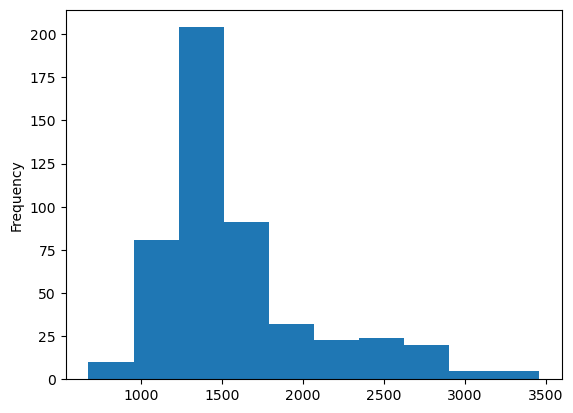

In [64]:
tracts_rentdis2['Gross Rent'].plot.hist()

In [65]:
## Now let's see it on a better map.

(-118.485410442826, -118.16541176882629, 33.78363832331894, 34.094443355303156)

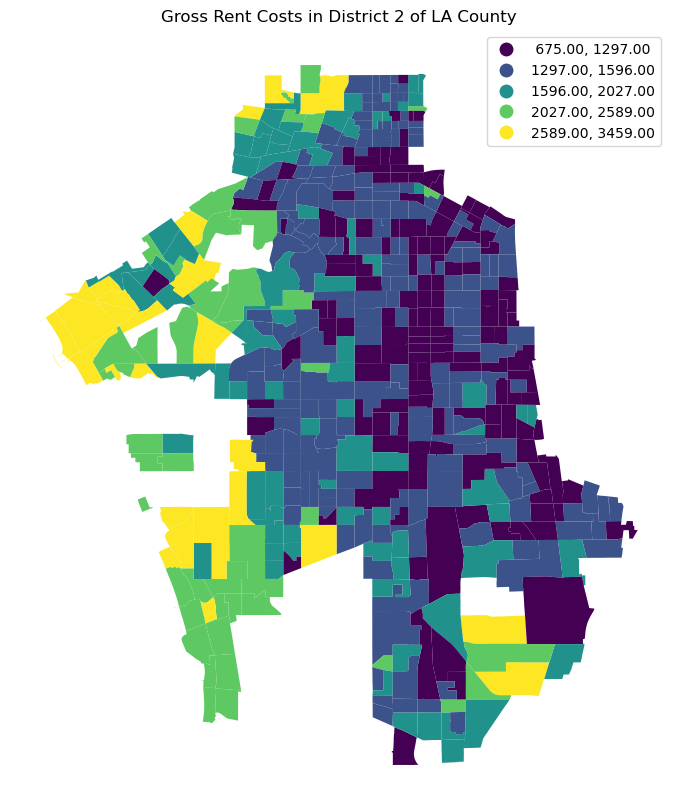

In [66]:
dis2_tractsrentmap = tracts_rentdis2.plot(figsize=(12,10),
                 column='Gross Rent',
                 legend=True,
                 scheme='NaturalBreaks')
dis2_tractsrentmap.set_title('Gross Rent Costs in District 2 of LA County')
dis2_tractsrentmap.axis('off')

In [67]:
## Map looks pretty good, we can see that higher rent tends to be more on the Westside of the District, lower rent is more
## on Eastside.

In [68]:
## Here I am not merging my District 5 data with my tracts_rent data, doing so on 'FIPS'.

In [69]:
tracts_rentdis5 = tracts_rent.merge(District5, on = "FIPS")

In [70]:
## Similar to above, I am using this code to get rid of any values showing up as '-' in the 'Gross Rent' column.

In [71]:
tracts_rentdis5 = tracts_rentdis5[tracts_rentdis5['Gross Rent'] != '-']

In [72]:
## Also like above, converting the values in 'Gross Rent' into integers.

In [73]:
tracts_rentdis5['Gross Rent'] = pd.to_numeric(tracts_rentdis5['Gross Rent'], errors='coerce')

In [74]:
## Dropping the NaN values in the 'Gross Rent' column.

In [75]:
tracts_rentdis5.dropna(subset=['Gross Rent'], inplace=True)

In [76]:
## Time to plot the data again, using same code as before. This graph looks different than District 2's, more census tracts
## fall between 1500 and 2000 here.

<Axes: ylabel='Frequency'>

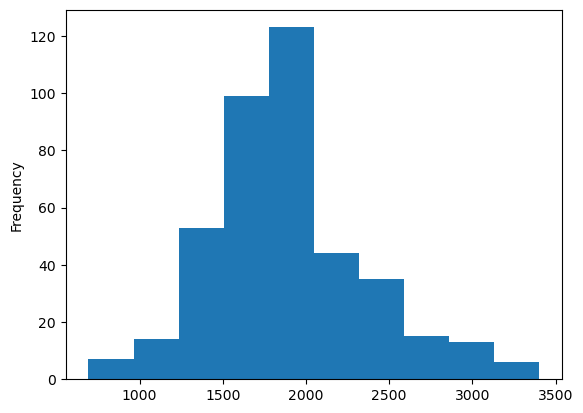

In [77]:
tracts_rentdis5['Gross Rent'].plot.hist()

In [78]:
## Now let's map it on a better map similar to the one above.

(-118.95661632230542,
 -117.59327715419354,
 34.032452176861014,
 34.86096567220503)

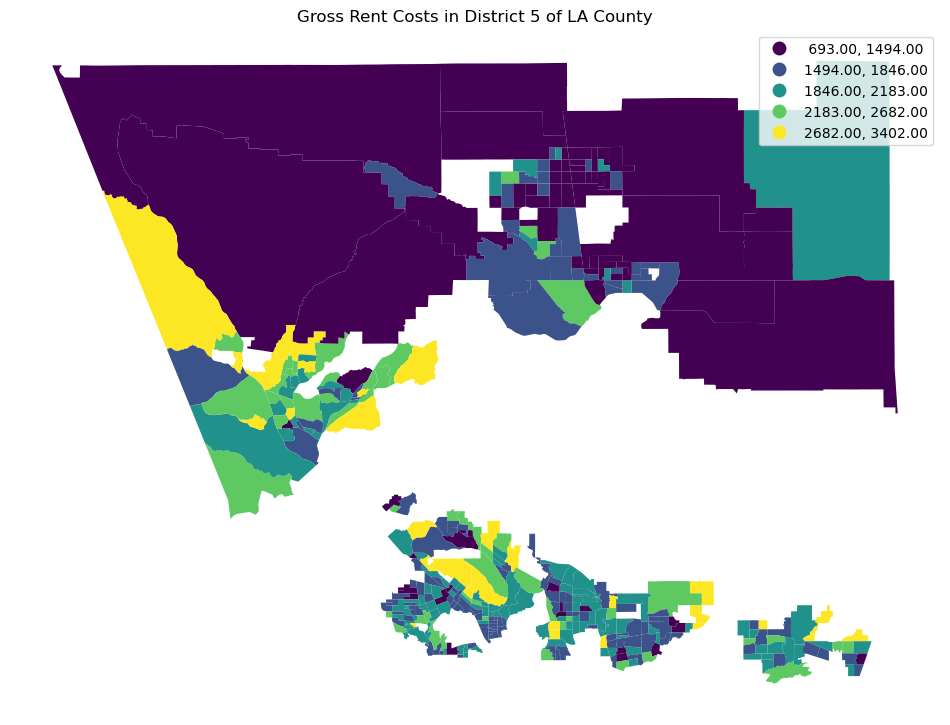

In [79]:
dis5_tractrentmap = tracts_rentdis5.plot(figsize=(12,10),
                 column='Gross Rent',
                 legend=True,
                 scheme='NaturalBreaks')
dis5_tractrentmap.set_title('Gross Rent Costs in District 5 of LA County')
dis5_tractrentmap.axis('off')

In [80]:
### Looks good! Here we can see the Census Tracts are much bigger, because population is so sparse, in the more densely
### populated tracts, we see higher rents.

In [81]:
## Now lets read in the Parks data from the County.

In [ ]:
parks = gpd.read_file('week5/Parks.geojson')
parks.head()

In [ ]:
## Here I am merging my Parks data with my data of the Rent in District 2 tracts, on the column of 'Polygon'.

In [ ]:
from shapely.geometry import Polygon
geopandas = gpd
parks_locationsD2 = geopandas.overlay(tracts_rentdis2, parks, how='intersection', keep_geom_type=None, make_valid=True)
parks_locationsD2

In [ ]:
## Now let's map this.

In [ ]:
dis2_tractsrentmap = parks_locationsD2.plot(figsize=(12,10),
                            column='Gross Rent',
                 legend=True,
                 scheme='NaturalBreaks')
dis2_tractsrentmap.set_title('Parks in relation to Rents in their Census Tracts in LA Supervisorial District 2')
plt.savefig('D2_Rent_Parks_Pct.jpg')
plt.show()

In [ ]:
## Now let's do the same for District 5, merging on "Polygon'.

In [ ]:
parks_locationsD5 = geopandas.overlay(tracts_rentdis5, parks, how='intersection', keep_geom_type=None, make_valid=True)

In [ ]:
## Let's map this the same as before, for District 5.

In [ ]:
dis5_tractsrentmap = parks_locationsD5.plot(figsize=(12,10),
                            column='Gross Rent',
                 legend=True,
                 scheme='NaturalBreaks')
dis5_tractsrentmap.set_title('Parks in relation to Rents in their Census Tracts in LA Supervisorial District 5')
plt.savefig('D5_Rent_Parks_Pct.jpg')
plt.show()

In [ ]:
## This is interesting, there is a very large park, most likely a national park. It borders a park in an area with the highest
## rent. We can see that the large park may have a low rent because few people actually live there. Lots of parks can be found
## in Southern part of the District, it is more densely populated.

In [ ]:
## Now lets map the unhoused Population in District 2.

In [ ]:
Dis2_tractshomemap = Dis2_tracthome.plot(figsize=(12,10),
                 column='Total Population',
                 legend=True,
                 scheme='NaturalBreaks')
Dis2_tractshomemap.set_title('Total Unhoused Population in District 2 of LA County')
Dis2_tractshomemap.axis('off')

In [ ]:
## Now let's do the same as with District 2, but this time with District 5.

In [ ]:
Dis5_tractshomemap = Dis5_tracthome.plot(figsize=(12,10),
                 column='Total Population',
                 legend=True,
                 scheme='NaturalBreaks')
Dis5_tractshomemap.set_title('Total Unhoused Population in District 5 of LA County')
Dis5_tractshomemap.axis('off')

In [ ]:
## Now let's merge Parks data with Homeless data like we did with the rent. We are merging on the Polygon.

In [ ]:
parks_locationshomeD2 = geopandas.overlay(Dis2_tracthome, parks, how='intersection', keep_geom_type=None, make_valid=True)

In [ ]:
## Now we can map this like we did with the rent. Interesting, the bigger parks seem to have more unhoused individuals with one small one having the most.

In [ ]:
dis2_tractshomemap = parks_locationshomeD2.plot(figsize=(12,10),
                            column='Total Population',
                 legend=True,
                 scheme='NaturalBreaks')
dis2_tractshomemap.set_title('Parks in relation to Total Unhoused in their Census Tracts in LA Supervisorial District 2')
plt.savefig('D2_Home_Parks_Pct.jpg')
plt.show()

In [ ]:
## Now lets do the same with District 5, merging parks with homeless count.

In [ ]:
parks_locationshomeD5 = geopandas.overlay(Dis5_tracthome, parks, how='intersection', keep_geom_type=None, make_valid=True)
parks_locationshomeD5

In [ ]:
## Now we can map it like we did before, interesting that the parks in the Northeast corner hold a lot of unhoused residents.

In [ ]:
dis5_tractshomemap = parks_locationshomeD5.plot(figsize=(12,10),
                            column='Total Population',
                 legend=True,
                 scheme='NaturalBreaks')
dis5_tractshomemap.set_title('Parks in relation to Total Unhoused in their Census Tracts in LA Supervisorial District 5')
plt.savefig('D5_Home_Parks_Pct.jpg')
plt.show()

In [ ]:
## Now let's import folium and try to visualize the data. I'm not a fan of this map, it is not very helpful.

In [ ]:
import folium

In [ ]:
mymap = folium.Map(location=[34.2,-118.2], zoom_start=10)  # Los Angeles coordinates

# Add GeoJSON data to the map
folium.GeoJson(
    parks_locationshomeD5,
    name='Parks',
).add_to(mymap)

legend_html = '''
     <div style="position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: 120px;
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; Parks <br>
     &nbsp; <img src="https://via.placeholder.com/10/00FF00"> &nbsp; Park
     <br>
     &nbsp; <img src="https://via.placeholder.com/10/FF0000"> &nbsp; Another Park
      </div>
     '''

mymap.get_root().html.add_child(folium.Element(legend_html))
# Display the map
mymap

In [ ]:
## Let's try another way, using Chris' code from the lecture. Looks good, now to repeat for District 5.

In [ ]:
m = folium.Map(location=[34.2,-118.2],
               zoom_start = 9,
               tiles='CartoDB positron',
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_rentdis2 , # geo data
                  data=tracts_rentdis2 , # data
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Gross Rent'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1,
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Gross Rent').add_to(m)    # name on the legend color bar
m

In [ ]:
m.save('tracts_home2.html')

In [ ]:
## Did the same thing here with District 5, this is good for helping visualize and compare rents across areas.

In [ ]:
m = folium.Map(location=[34.2,-118.2],
               zoom_start = 9,
               tiles='CartoDB positron',
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_rentdis5 , # geo data
                  data=tracts_rentdis5 , # data
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Gross Rent'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1,
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Gross Rent').add_to(m)    # name on the legend color bar
m

In [ ]:
m.save('tracts_home5.html')

In [ ]:
## Now we can repeat but this time with the homeless population in District 2.

In [ ]:
m = folium.Map(location=[34.2,-118.2],
               zoom_start = 9,
               tiles='CartoDB positron',
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=Dis2_tracthome , # geo data
                  data=Dis2_tracthome , # data
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Total Population'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1,
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Total Population').add_to(m)    # name on the legend color bar
m

In [ ]:
m.save('tracts_home2.html')

In [ ]:
## Now doing it again, but with District 5. Looks good.

In [ ]:
m = folium.Map(location=[34.2,-118.2],
               zoom_start = 9,
               tiles='CartoDB positron',
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=Dis5_tracthome , # geo data
                  data=Dis5_tracthome , # data
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Total Population'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.1,
                  fill_opacity=0.8,
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Total Population').add_to(m)    # name on the legend color bar
m

In [ ]:
m.save('tracts_home5.html')

In [ ]:
## Now let's do it with the merged homeless count and parks data. Very weird, I don't see anything showing for the 2nd District, let's try the 5th.

In [ ]:
import folium

# Initialize Folium map
m = folium.Map(location=[34.2, -118.2], zoom_start=9, tiles='CartoDB positron', attribution='CartoDB')

# Plot choropleth over the base map
folium.Choropleth(
    geo_data=parks_locationshomeD2,  # GeoJSON or GeoDataFrame
    data=parks_locationshomeD2,       # Dataframe or Series
    key_on='feature.properties.FIPS',  # GeoJSON property to bind the data to
    columns=['FIPS', 'Total Population'],  # Column(s) in the dataframe to use
    fill_color='BuPu',  # Color scale
    line_weight=0.1,
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='<Unhoused Population near Parks>'  # Name on the legend color bar
).add_to(m)
m

In [ ]:
m.save('park_homeless2.html')

In [ ]:
## Huh, interesting, it does show up on this map, we can see the parks and the number of unhoused.

In [ ]:
import folium

# Initialize Folium map
m = folium.Map(location=[34.2, -118.2], zoom_start=9, tiles='CartoDB positron', attribution='CartoDB')

# Plot choropleth over the base map
folium.Choropleth(
    geo_data=parks_locationshomeD5,  # GeoJSON or GeoDataFrame
    data=parks_locationshomeD5,       # Dataframe or Series
    key_on='feature.properties.FIPS',  # GeoJSON property to bind the data to
    columns=['FIPS', 'Total Population'],  # Column(s) in the dataframe to use
    fill_color='BuPu',  # Color scale
    line_weight=0.1,
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='<Unhoused near Parks>'  # Name on the legend color bar
).add_to(m)
m

In [ ]:
m.save('park_homeless5.html')

In [ ]:
## Now lets do the data of parks with the gross rents. Here is District 2.

In [ ]:
import folium

# Initialize Folium map
m = folium.Map(location=[34.2, -118.2], zoom_start=9, tiles='CartoDB positron', attribution='CartoDB')

# Plot choropleth over the base map
folium.Choropleth(
    geo_data=parks_locationsD2,  # GeoJSON or GeoDataFrame
    data=parks_locationsD2,       # Dataframe or Series
    key_on='feature.properties.FIPS',  # GeoJSON property to bind the data to
    columns=['FIPS', 'Gross Rent'],  # Column(s) in the dataframe to use
    fill_color='BuPu',  # Color scale
    line_weight=0.1,
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Rent in District 2'  # Name on the legend color bar
).add_to(m)
m

In [ ]:
m.save('park_rent2.html')

In [ ]:
## Here is District 5, with parks and gross rent.

In [ ]:
import folium

# Initialize Folium map
m = folium.Map(location=[34.2, -118.2], zoom_start=9, tiles='CartoDB positron', attribution='CartoDB')

# Plot choropleth over the base map
folium.Choropleth(
    geo_data=parks_locationsD5,  # GeoJSON or GeoDataFrame
    data=parks_locationsD5,       # Dataframe or Series
    key_on='feature.properties.FIPS',  # GeoJSON property to bind the data to
    columns=['FIPS', 'Gross Rent'],  # Column(s) in the dataframe to use
    fill_color='BuPu',  # Color scale
    line_weight=0.1,
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Rent in District 5'  # Name on the legend color bar
).add_to(m)
m

In [ ]:
m.save('park_rent5.html')